# 🎲 Simulação de Monte Carlo para Consumo de Energia
Este notebook utiliza variáveis aleatórias simuladas (temperatura, ocupação, CO₂, umidade) para prever o consumo de energia usando uma abordagem de Monte Carlo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 🔸 Geração de Variáveis Aleatórias

In [2]:
np.random.seed(42)
n = 1000  # número de amostras

# Geração das variáveis
temperatura = np.random.normal(loc=24, scale=2, size=n)  # graus Celsius
umidade = np.random.normal(loc=50, scale=10, size=n)     # %
co2 = np.random.normal(loc=600, scale=100, size=n)        # ppm
ocupacao = np.random.randint(0, 20, size=n)               # número de pessoas

# Simulação do consumo energético (modelo fictício)
consumo = 50 + 1.2 * temperatura + 0.8 * ocupacao + 0.03 * co2 - 0.5 * umidade
consumo += np.random.normal(0, 5, size=n)  # ruído

df = pd.DataFrame({
    "Temperatura": temperatura,
    "Umidade": umidade,
    "CO2": co2,
    "Ocupação": ocupacao,
    "Consumo (kWh)": consumo
})

df.head()

,Temperatura,Umidade,CO2,Ocupação,Consumo (kWh)
0,24.993428,63.993554,532.482173,8,76.558424
1,23.723471,59.246337,585.548133,6,78.105950
2,25.295377,50.596304,520.758008,14,80.543409
3,27.046060,43.530632,569.203847,1,80.881747
4,23.531693,56.982233,410.638533,19,75.468627


## 🔸 Visualização das Distribuições

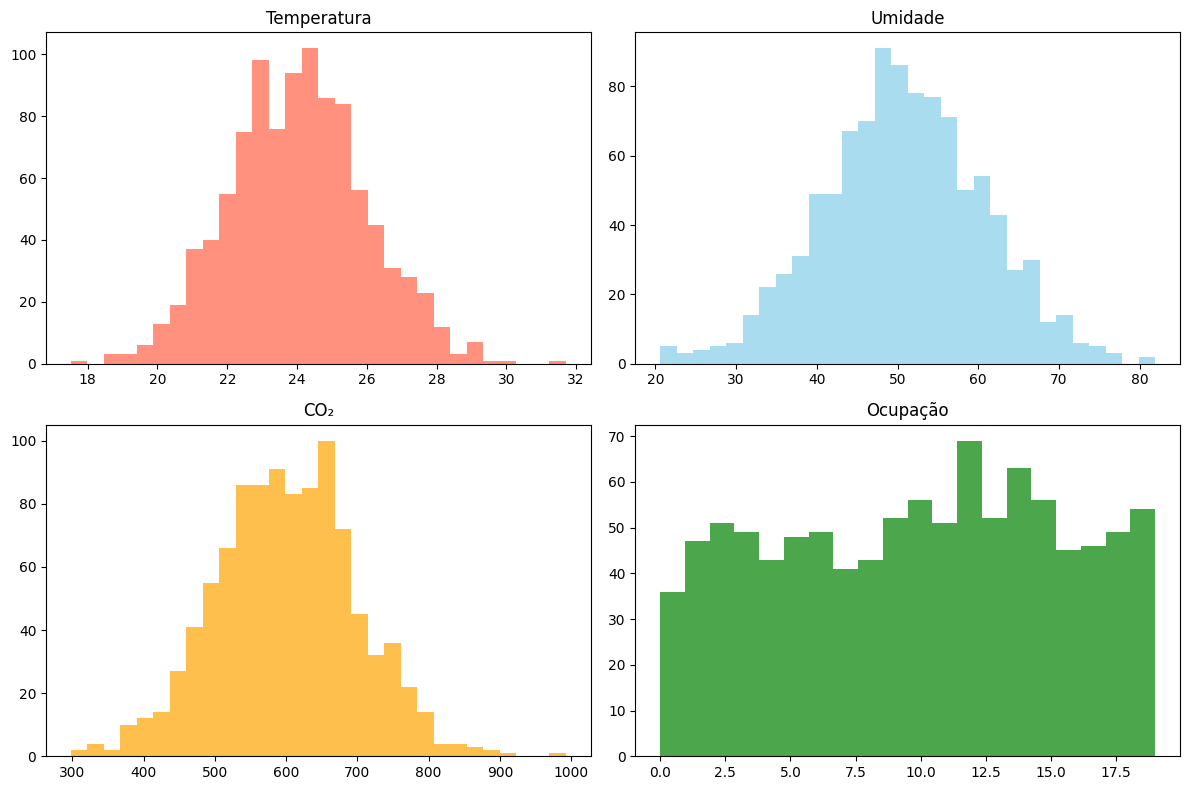

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(temperatura, bins=30, color='tomato', alpha=0.7)
axs[0, 0].set_title("Temperatura")

axs[0, 1].hist(umidade, bins=30, color='skyblue', alpha=0.7)
axs[0, 1].set_title("Umidade")

axs[1, 0].hist(co2, bins=30, color='orange', alpha=0.7)
axs[1, 0].set_title("CO₂")

axs[1, 1].hist(ocupacao, bins=20, color='green', alpha=0.7)
axs[1, 1].set_title("Ocupação")

plt.tight_layout()
plt.show()

## 🔸 Gráfico de Consumo Simulado

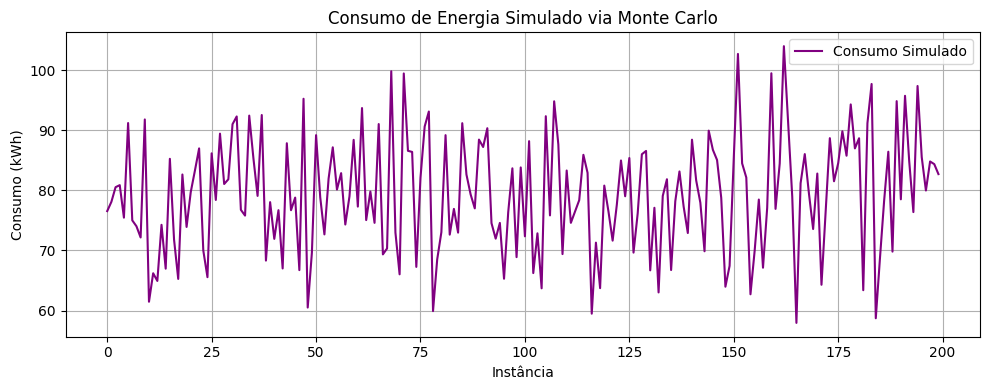

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(consumo[:200], label="Consumo Simulado", color='purple')
plt.title("Consumo de Energia Simulado via Monte Carlo")
plt.xlabel("Instância")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 🔸 Estatísticas do Consumo

In [5]:
df["Consumo (kWh)"].describe()

,Consumo (kWh)
count,1000.000000
mean,79.454895
std,9.115236
min,51.828593
25%,73.282683
50%,78.967679
75%,85.658562
max,107.474842
